In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib
df=pd.read_csv('D://datasets//TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
1,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
3,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
4,2010-07-07,3.280000,3.326000,2.996000,3.160000,3.160000,34608500
...,...,...,...,...,...,...,...
2574,2020-09-21,453.130005,455.679993,407.070007,449.390015,449.390015,109476800
2575,2020-09-22,429.600006,437.760010,417.600006,424.230011,424.230011,79580800
2576,2020-09-23,405.160004,412.149994,375.880005,380.359985,380.359985,95074200
2577,2020-09-24,363.799988,399.500000,351.299988,387.790009,387.790009,96561100


In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2579,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2.579000e+03
mean,2015-08-13 05:51:12.353625344,49.206686,50.301806,48.073117,49.253279,49.253279,3.078217e+07
min,2010-06-30 00:00:00,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,2013-01-22 12:00:00,7.159000,7.268000,6.989000,7.153000,7.153000,1.047400e+07
50%,2015-08-13 00:00:00,44.001999,44.660000,43.301998,43.924000,43.924000,2.413100e+07
75%,2018-03-06 12:00:00,59.339000,60.171000,57.841000,59.020000,59.020000,3.979150e+07
max,2020-09-25 00:00:00,502.140015,502.489990,470.510010,498.320007,498.320007,3.046940e+08
std,NaN,57.934102,59.888383,55.852349,58.119783,58.119783,2.855717e+07


In [15]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [19]:
correlation = df.corr()
print(correlation)

               Date      Open      High       Low     Close  Adj Close  \
Date       1.000000  0.661101  0.656925  0.666737  0.660408   0.660408   
Open       0.661101  1.000000  0.999336  0.999139  0.998581   0.998581   
High       0.656925  0.999336  1.000000  0.998967  0.999401   0.999401   
Low        0.666737  0.999139  0.998967  1.000000  0.999197   0.999197   
Close      0.660408  0.998581  0.999401  0.999197  1.000000   1.000000   
Adj Close  0.660408  0.998581  0.999401  0.999197  1.000000   1.000000   
Volume     0.534725  0.520234  0.525483  0.516526  0.520347   0.520347   

             Volume  
Date       0.534725  
Open       0.520234  
High       0.525483  
Low        0.516526  
Close      0.520347  
Adj Close  0.520347  
Volume     1.000000  


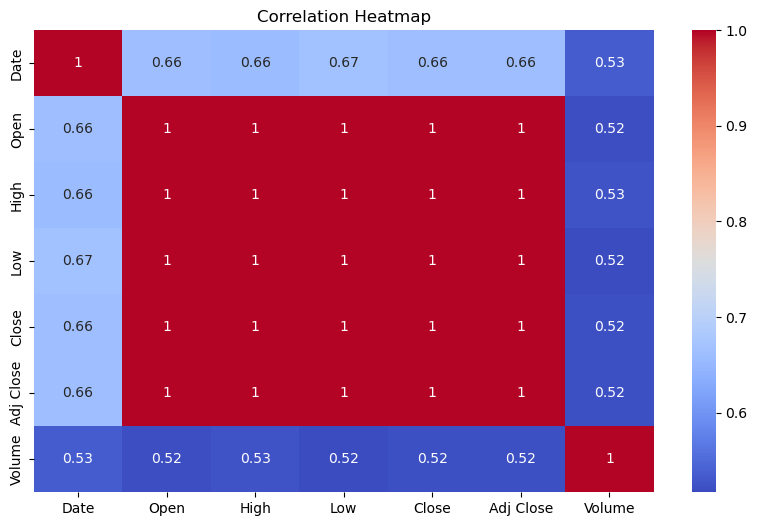

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

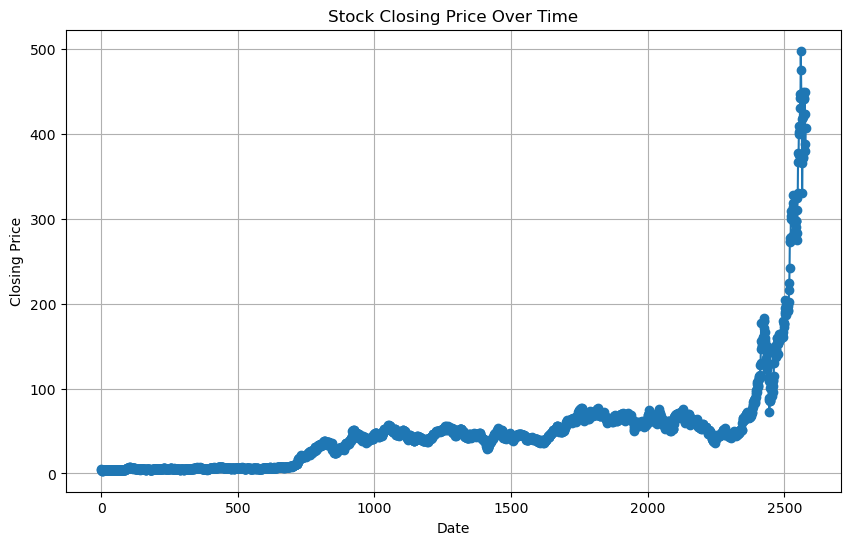

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(dt.index, dt['Close'], marker='o')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

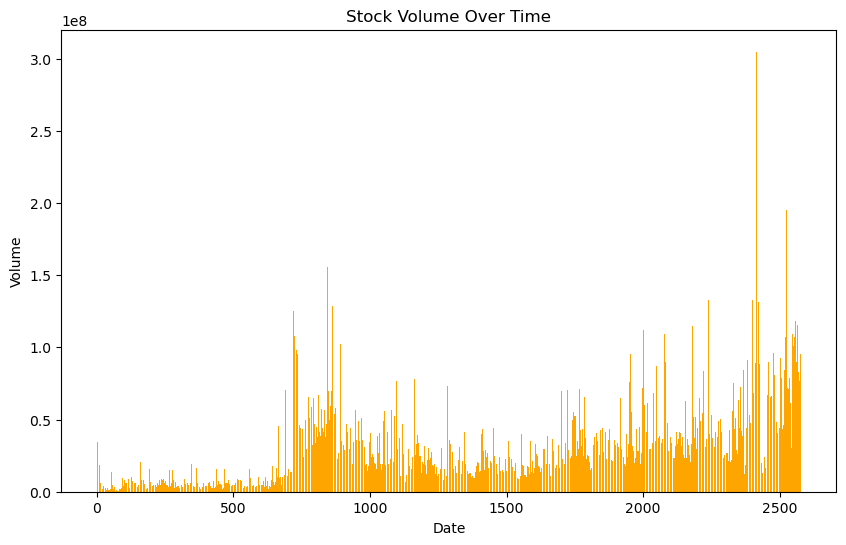

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(dt.index, dt['Volume'], color='orange')
plt.title('Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

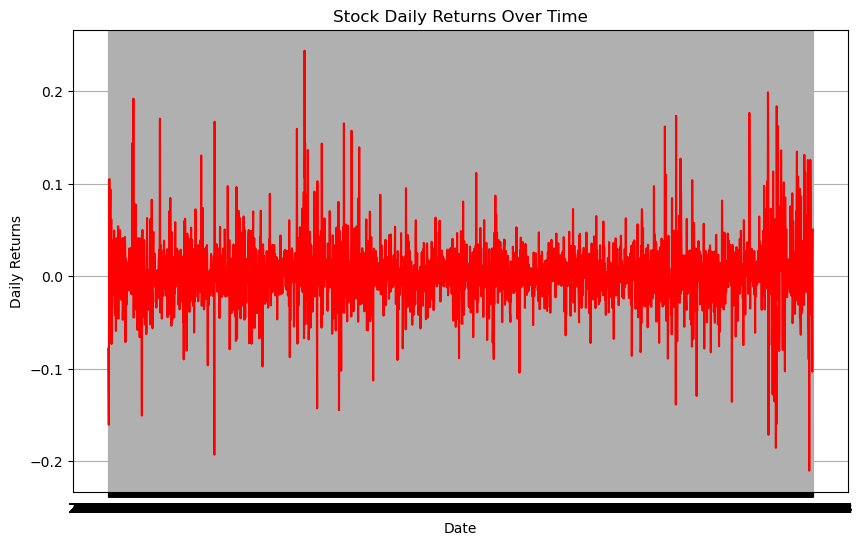

In [27]:
dt['Daily Return'] = dt['Close'].pct_change()
plt.figure(figsize=(10,6))
plt.plot(dt['Date'], dt['Daily Return'], color='red')
plt.title('Stock Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.grid(True)
plt.show()

In [29]:
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

In [31]:
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Target']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Support Vector Machine": SVC(kernel='linear')
}

In [59]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.52
Naive Bayes Accuracy: 0.48
K-Nearest Neighbors Accuracy: 0.50
Support Vector Machine Accuracy: 0.52


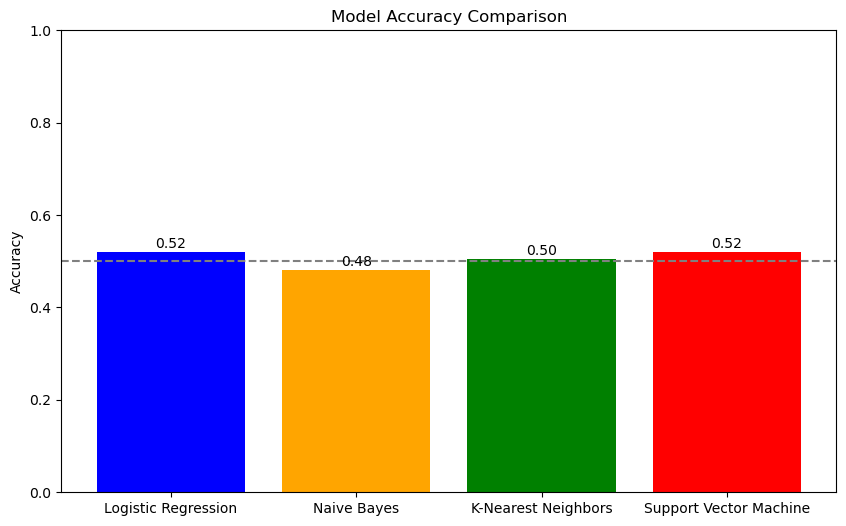

In [61]:
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['blue', 'orange', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set limit to 1 (100%)
plt.axhline(y=0.5, color='grey', linestyle='--')  # Add a line at 0.5 for reference
for i, v in enumerate(results.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

In [63]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
joblib.dump(best_model, 'best_stock_prediction_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print(f"Best model ({best_model_name}) saved successfully!")

Best model (Logistic Regression) saved successfully!
